In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
etfs = ['IAU', 'QQQ', 'SPY', 'IB01.L']
data = yf.download(etfs, '2015-01-01')['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [3]:
returns = data.pct_change().shift(-1)
signals = pd.DataFrame(index=data.index, columns=['Signal'])

C:\Users\juana\AppData\Local\Temp\ipykernel_6664\1391271985.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().shift(-1)


In [4]:
for date in signals.index:
    if date.month in [12, 1, 2]:
        signals.loc[date, 'Signal'] = 'IAU'
    elif date.month in [4, 5, 6]:
        signals.loc[date, 'Signal'] = 'QQQ'
    elif date.month in [7, 8, 9]:
        signals.loc[date, 'Signal'] = 'IAU'
    elif date.month in [10, 11]:
        signals.loc[date, 'Signal'] = 'SPY'
    else:
        signals.loc[date, 'Signal'] = 'IB01.L'

In [5]:
strategy_returns = pd.DataFrame(index=signals.index)

for etf in etfs:
    strategy_returns[f'Strat_{etf}'] = np.where(signals['Signal'] == etf, returns[etf], 0)

strategy_returns['Strategy'] = strategy_returns.sum(axis=1)

cumulative_strategy_returns = (1 + strategy_returns['Strategy']).cumprod()
cumulative_returns_gld = (1 + returns['IAU']).cumprod()
cumulative_returns_qqq = (1 + returns['QQQ']).cumprod()
cumulative_returns_spy = (1 + returns['SPY']).cumprod()

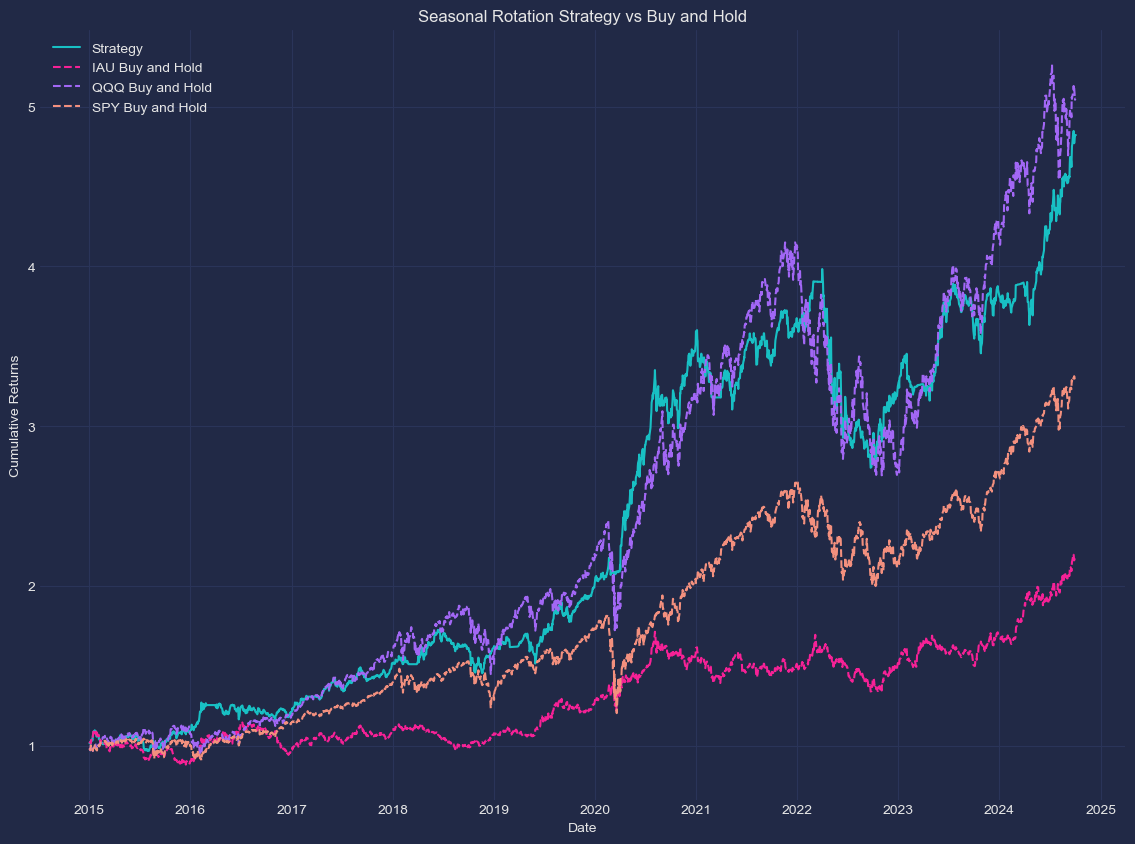

In [7]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")
plt.figure(figsize=(14,10))
plt.plot(cumulative_strategy_returns, label='Strategy')
plt.plot(cumulative_returns_gld, label='IAU Buy and Hold', linestyle='--')
plt.plot(cumulative_returns_qqq, label='QQQ Buy and Hold', linestyle='--')
plt.plot(cumulative_returns_spy, label='SPY Buy and Hold', linestyle='--')
plt.title('Seasonal Rotation Strategy vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()